In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data = pd.read_csv("TRAIN.csv")
test_data = pd.read_csv('TEST_FINAL.csv')
sample_submission = pd.read_csv('SAMPLE.csv')

In [3]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
train_data.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [6]:
test_data.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

In [7]:
## Checking Number of Unique Stores in train and test set
print("Number of unique stores in Train Data : "+str(train_data['Store_id'].nunique()))
print("Number of unique stores in Test Data : "+str(test_data['Store_id'].nunique()))

Number of unique stores in Train Data : 365
Number of unique stores in Test Data : 365


# Treat as a Regression Problem with store and other variables as features

In [8]:
train_data.nunique() # Cardinality Check

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [9]:
test_data.nunique()

ID               22265
Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Date                61
Holiday              2
Discount             2
dtype: int64

# Exploratory Data Analysis

In [10]:
train_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [11]:
test_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [12]:
## Checking Region Wise Sales
region_data = train_data.groupby('Region_Code').agg({'Sales':'sum',
                                     'Store_id':'nunique',
                                                   '#Order':'sum'
                                                    })

In [13]:
region_data.head()

,Sales,Store_id,#Order
Region_Code,,,
R1,2.992243e+09,124,5094794
R2,2.170172e+09,105,3402429
R3,1.870205e+09,86,2834847
R4,1.025381e+09,50,1513790


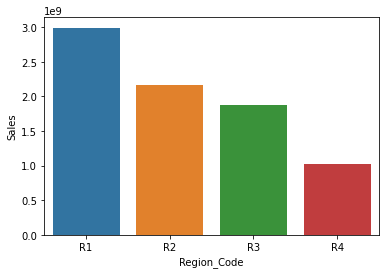

In [14]:
sns.barplot(y = 'Sales',x = region_data.index,data = region_data)
plt.show()

In [15]:
## Checking location Wise Sales
location_type_data = train_data.groupby('Location_Type').agg({'Sales':'sum',
                                     'Store_id':'nunique',
                                                   '#Order':'sum'
                                                    })

In [16]:
location_type_data

,Sales,Store_id,#Order
Location_Type,,,
L1,3.529359e+09,165,5556742
L2,2.872964e+09,94,4600675
L3,9.897865e+08,58,1590881
L4,3.149745e+08,21,513475
L5,3.509163e+08,27,584087


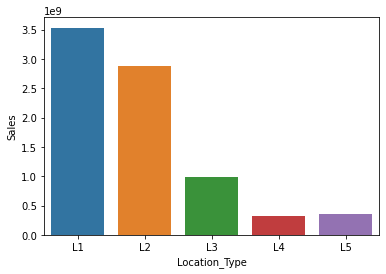

In [17]:
sns.barplot(y = 'Sales',x = location_type_data.index,data = location_type_data)
plt.show()

In [18]:
## Checking Region Wise Sales
holiday_data = train_data.groupby('Holiday').agg({'Sales':'sum',
                                     'Store_id':'nunique',
                                                   '#Order':'sum'
                                                    })

In [19]:
holiday_data

,Sales,Store_id,#Order
Holiday,,,
0,7.178085e+09,365,11425695
1,8.799156e+08,365,1420165


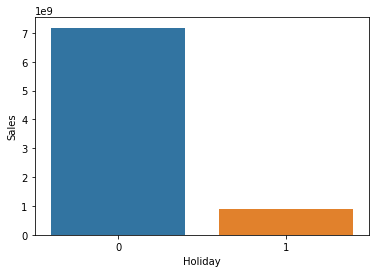

In [20]:
sns.barplot(y = 'Sales',x = holiday_data.index,data = holiday_data)
plt.show()

# Creating Datetime Features

In [21]:
train_data['Date'] = pd.to_datetime(train_data['Date'],format = '%Y-%m-%d')

In [22]:
test_data['Date'] = pd.to_datetime(test_data['Date'],format = '%Y-%m-%d')

In [23]:
train_data['Day'] = train_data['Date'].dt.day

In [24]:
test_data['Day'] = test_data['Date'].dt.day

In [25]:
train_data['Day_Name'] = train_data['Date'].dt.strftime("%A")

In [26]:
test_data['Day_Name'] = test_data['Date'].dt.strftime("%A")

In [27]:
train_data.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Day_Name
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,31,Friday
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,31,Friday
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,31,Friday
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,31,Friday
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00,31,Friday


In [28]:
test_data.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Day,Day_Name
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No,31,Wednesday
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No,31,Wednesday
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes,31,Wednesday
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No,31,Wednesday
22264,T1210605,365,S2,L1,R2,2019-07-31,0,No,31,Wednesday


# Creating More Store Type Specific Features


In [108]:
store_data = train_data.groupby('Store_Type',as_index = False).agg({'Sales':'sum','#Order':'sum',
                                                                  'Date':'nunique'
                                                                } ) 
store_data.columns = ['Store_Type','Total_Sales','Total_Orders','Total_Days']

In [109]:
store_data.head()

,Store_Type,Total_Sales,Total_Orders,Total_Days
0,S1,3.343866e+09,5149577,516
1,S2,7.955308e+08,1169502,516
2,S3,1.165658e+09,1824495,516
3,S4,2.752946e+09,4702286,516


In [110]:
store_data['Avg_Sales_Per_Day'] = store_data['Total_Sales']/store_data['Total_Days']

In [111]:
store_data['Avg_Orders_Per_Day'] = store_data['Total_Orders']/store_data['Total_Days']

In [112]:
store_data.describe()

,Total_Sales,Total_Orders,Total_Days,Avg_Sales_Per_Day,Avg_Orders_Per_Day
count,4.000000e+00,4.000000e+00,4.0,4.000000e+00,4.000000
mean,2.014500e+09,3.211465e+06,516.0,3.904070e+06,6223.769380
std,1.227319e+09,2.006001e+06,0.0,2.378525e+06,3887.599484
min,7.955308e+08,1.169502e+06,516.0,1.541726e+06,2266.476744
25%,1.073126e+09,1.660747e+06,516.0,2.079702e+06,3218.501453
50%,1.959302e+09,3.263390e+06,516.0,3.797097e+06,6324.400194
75%,2.900676e+09,4.814109e+06,516.0,5.621465e+06,9329.668120
max,3.343866e+09,5.149577e+06,516.0,6.480360e+06,9979.800388


In [113]:
store_data = store_data[['Store_Type','Avg_Sales_Per_Day','Avg_Orders_Per_Day']]

# Joining Store Data with Parent Data

In [114]:
train_data_new = pd.merge(train_data,store_data,on = ['Store_Type'],how = 'left')

In [115]:
train_data_new.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Day_Name,Avg_Sales_Per_Day,Avg_Orders_Per_Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,Monday,6.480360e+06,9979.800388
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,Monday,5.335166e+06,9112.957364
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,Monday,2.259027e+06,3535.843023
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,Monday,1.541726e+06,2266.476744
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,Monday,1.541726e+06,2266.476744


In [116]:
test_data_new = pd.merge(test_data,store_data,on = ['Store_Type'],how = 'left')

In [117]:
test_data_new.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Day,Day_Name,Avg_Sales_Per_Day,Avg_Orders_Per_Day
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,1,Saturday,5.335166e+06,9112.957364
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,1,Saturday,6.480360e+06,9979.800388
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,1,Saturday,5.335166e+06,9112.957364
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,1,Saturday,6.480360e+06,9979.800388
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,1,Saturday,6.480360e+06,9979.800388


In [118]:
train_data_new.isnull().sum()

ID                    0
Store_id              0
Store_Type            0
Location_Type         0
Region_Code           0
Date                  0
Holiday               0
Discount              0
#Order                0
Sales                 0
Day                   0
Day_Name              0
Avg_Sales_Per_Day     0
Avg_Orders_Per_Day    0
dtype: int64

In [119]:
test_data_new.isnull().sum()

ID                    0
Store_id              0
Store_Type            0
Location_Type         0
Region_Code           0
Date                  0
Holiday               0
Discount              0
Day                   0
Day_Name              0
Avg_Sales_Per_Day     0
Avg_Orders_Per_Day    0
dtype: int64

# Subsetting Variables

In [120]:
train_data_new.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'Day', 'Day_Name',
       'Avg_Sales_Per_Day', 'Avg_Orders_Per_Day'],
      dtype='object')

In [121]:
X = train_data_new[['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Day','Day_Name',
       'Holiday', 'Discount','Avg_Sales_Per_Day', 'Avg_Orders_Per_Day']]

In [122]:
y = train_data_new['Sales']

# Subsetting Categorical Variables - Removing Store ID

In [123]:
numeric_cols = ['Day','Avg_Sales_Per_Day', 'Avg_Orders_Per_Day']
categorical_cols = ['Store_Type', 'Location_Type', 'Region_Code', 'Day','Day_Name',
       'Holiday', 'Discount']

## Min Max Scaling Numeric Columns

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X[numeric_cols])


## One Hot Encoding Categorical Columns

In [125]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [126]:
X.head()

,Store_id,Store_Type,Location_Type,Region_Code,Day,Day_Name,Holiday,Discount,Avg_Sales_Per_Day,Avg_Orders_Per_Day
0,1,S1,L3,R1,1,Monday,1,Yes,6.480360e+06,9979.800388
1,253,S4,L2,R1,1,Monday,1,Yes,5.335166e+06,9112.957364
2,252,S3,L2,R1,1,Monday,1,Yes,2.259027e+06,3535.843023
3,251,S2,L3,R1,1,Monday,1,Yes,1.541726e+06,2266.476744
4,250,S2,L3,R4,1,Monday,1,Yes,1.541726e+06,2266.476744


In [127]:
X[numeric_cols] = scaler.transform(X[numeric_cols])
X[encoded_cols] = encoder.transform(X[categorical_cols])

<ipython-input-127-6d478ddb4482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.transform(X[numeric_cols])
C:\Users\INNODVOH\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\INNODVOH\Anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [128]:
all_cols = numeric_cols + encoded_cols

In [129]:
all_cols

['Day',
 'Avg_Sales_Per_Day',
 'Avg_Orders_Per_Day',
 'Store_Type_S1',
 'Store_Type_S2',
 'Store_Type_S3',
 'Store_Type_S4',
 'Location_Type_L1',
 'Location_Type_L2',
 'Location_Type_L3',
 'Location_Type_L4',
 'Location_Type_L5',
 'Region_Code_R1',
 'Region_Code_R2',
 'Region_Code_R3',
 'Region_Code_R4',
 'Day_1',
 'Day_2',
 'Day_3',
 'Day_4',
 'Day_5',
 'Day_6',
 'Day_7',
 'Day_8',
 'Day_9',
 'Day_10',
 'Day_11',
 'Day_12',
 'Day_13',
 'Day_14',
 'Day_15',
 'Day_16',
 'Day_17',
 'Day_18',
 'Day_19',
 'Day_20',
 'Day_21',
 'Day_22',
 'Day_23',
 'Day_24',
 'Day_25',
 'Day_26',
 'Day_27',
 'Day_28',
 'Day_29',
 'Day_30',
 'Day_31',
 'Day_Name_Friday',
 'Day_Name_Monday',
 'Day_Name_Saturday',
 'Day_Name_Sunday',
 'Day_Name_Thursday',
 'Day_Name_Tuesday',
 'Day_Name_Wednesday',
 'Holiday_0',
 'Holiday_1',
 'Discount_No',
 'Discount_Yes']

In [130]:
X_new  = X[all_cols]

In [131]:
X_new.head()

,Day,Avg_Sales_Per_Day,Avg_Orders_Per_Day,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,...,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Holiday_0,Holiday_1,Discount_No,Discount_Yes
0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.768115,0.887617,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.145243,0.164568,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Transforming Test Set

In [132]:
X_test = test_data_new.copy().drop('ID',axis = 1)

In [133]:
X_test.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Day,Day_Name,Avg_Sales_Per_Day,Avg_Orders_Per_Day
0,171,S4,L2,R3,2019-06-01,0,No,1,Saturday,5.335166e+06,9112.957364
1,172,S1,L1,R1,2019-06-01,0,No,1,Saturday,6.480360e+06,9979.800388
2,173,S4,L2,R1,2019-06-01,0,No,1,Saturday,5.335166e+06,9112.957364
3,174,S1,L1,R4,2019-06-01,0,No,1,Saturday,6.480360e+06,9979.800388
4,170,S1,L1,R2,2019-06-01,0,No,1,Saturday,6.480360e+06,9979.800388


In [134]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [135]:
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])

In [136]:
all_cols = numeric_cols + encoded_cols

In [137]:
X_test_new = X_test[all_cols]

# Basic Modelling

In [138]:
from xgboost import XGBRegressor


In [139]:
model = XGBRegressor(random_state=42, n_jobs=-1)


In [140]:
model.fit(X_new,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
preds = model.predict(X_test_new)

In [142]:
preds

array([52976.4  , 37304.89 , 65589.4  , ..., 42389.734, 28787.375,
       22977.408], dtype=float32)

# Code for Submission

In [143]:
sample_submission.head()

,ID,Sales
0,T1188341,48793.476562
1,T1188342,36298.175781
2,T1188343,72785.062500
3,T1188344,36019.777344
4,T1188345,40268.070312


In [144]:
sample_submission['Sales'] = preds

In [145]:
sample_submission.head()

,ID,Sales
0,T1188341,52976.398438
1,T1188342,37304.890625
2,T1188343,65589.398438
3,T1188344,38171.859375
4,T1188345,38185.011719


# Exporting csv

In [146]:
sample_submission.to_csv('XGB_First_with_store_type_features.csv',index = False)